In [1]:
##Logan Lauton
##Exploratory Data Analysis

##importing required packages for this exploratory data analysis
import requests
import oracledb
import getpass
import cx_Oracle
import os
import pandas as pd
import matplotlib.pyplot as plt

##connecting to the db as we did in grab_data.ipynb
password = getpass.getpass("Enter DB Password")
wallet_password = getpass.getpass("Enter Wallet Password")

os.environ.get('TNS_ADMIN')
connection = oracledb.connect(
    user="admin",
    password=password,
    dsn = "ltl3y0m4d7of29l1_high",
    config_dir="./config",
    wallet_location="./config",
    wallet_password=wallet_password)
print("Successfully connected to Oracle Database")

cursor = connection.cursor()

##selecting everything from the calls table and creating a df
rs = cursor.execute("SELECT * FROM CALLS")
df = pd.DataFrame(rs.fetchall())
print('Successfully imported table from Oracle Database')

Enter DB Password········
Enter Wallet Password········
Successfully connected to Oracle Database
Successfully imported table from Oracle Database


In [2]:
##properly naming the columns
df.columns = ['Call Number' , 'Date/Time' , 'Address' , 'District' , 'Nature of Call' , 'Status' , 'Latitude' , 'Longitude']

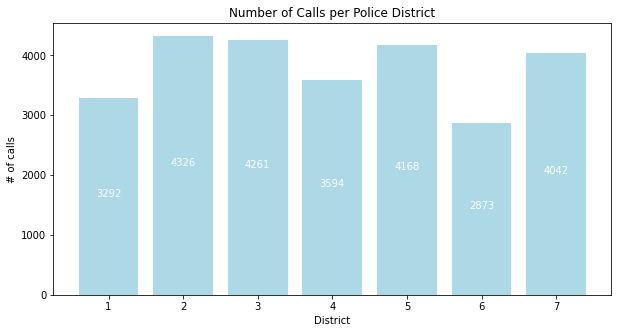

In [3]:
##counting occurrences of District in the df
occur = df.groupby(['District']).size()

##creating my x and y variables for a basic bar chart
##x is the district number
##y is the number of calls that occurs shown above
x = [1 , 2 , 3 , 4 , 5 , 6 , 7]
y = occur[0:7]
 
##function to add value labels to bar chart
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i+1, y[i]//2, y[i], ha = 'center', color = 'white')    
        
##building basic bar chart        
plt.figure(figsize = (10,5))
plt.bar(x , y , color = 'lightblue')
plt.title('Number of Calls per Police District')
plt.xlabel('District')
plt.ylabel('# of calls')

##using function to add numbers to plot
addlabels(x , y)

##showing the final plot
plt.show()

Still need to add the labels to graph below 

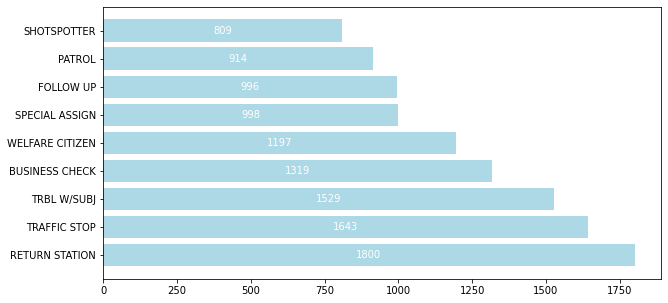

In [27]:
##gathering the number of occurences of specific crimes
occur_noc = df.groupby(['Nature of Call']).size()
##sorting the occurences in descending order
occur_noc = occur_noc.sort_values(ascending = False)
##placing the data into a df
noc_occur = pd.DataFrame(occur_noc)
##properly naming the column
noc_occur.columns = ['Number of Occurences']

##creating my x and y variables for a basic bar chart
##x is the Occurence Type
##y is the number of calls that occurs shown above
x_noc = list(noc_occur[0:9].index.values)
for i in list(noc_occur[0:9]):
    # show the list of values  
    y_noc = noc_occur[i].tolist()

##building basic bar chart  
fig, ax = plt.subplots(figsize = (10,5))
bars = ax.barh(x_noc , y_noc[0:9], color = 'lightblue')

for i in ax.containers:
    ax.bar_label(bars, label_type = 'center', color = 'white')

##showing the final plot
plt.show()

In [28]:
occur_noc

Nature of Call
RETURN STATION      1800
TRAFFIC STOP        1643
TRBL W/SUBJ         1529
BUSINESS CHECK      1319
WELFARE CITIZEN     1197
                    ... 
FIREWORKS              2
ESP TARGET ESCOR       1
FORGERY                1
METH LAB               1
WATER MAIN BREAK       1
Length: 129, dtype: int64

In [3]:
##Test to determine ethical considerations - Logan
##On February 7th, 2023 at appriximately 1:15am Milwaukee Police Officer 
##Peter Jerving was shot and killed in action. This is test is to determine 
##if we are able to find the call that he responded to earlier in the night
##and if we are able to what ethical quesitons need to be asked regarding 
## that.

##removing all non-district 4 calls as that was Officer Jerving's precinct
ethic = df.drop(df[df.District != '4'].index)

##seperation of Date & Time into seperate columns to go off of reports from
##media channels
ethic['Date'] = ethic['Date/Time'].str.split('\s+').str[0]
ethic['Time'] = ethic['Date/Time'].str.split('\s+').str[1]

##selecting only the 6th and 7th of Feb as this was the time frame that
##officer Jerving would be responding to a call
ethic_06 = ethic[(ethic.Date == '02/06/2023')]
ethic_07 = ethic[(ethic.Date == '02/07/2023')]
ethic = ethic_06
ethic = ethic.append(ethic_07)


##according to https://news.yahoo.com/news/milwaukee-police-officer-shot-killed-191640738.html?guccounter=1&guce_referrer=aHR0cHM6Ly9kdWNrZHVja2dvLmNvbS8&guce_referrer_sig=AQAAAJDKo_69SdT2K6T9yiBd87LklJWdolHnCY67y_FcvJNjnuM2JagHigHu8ORBmVOR37CNW5tV4QEiDZze6On-D1Z9JLth3jgL3vzTm5iFkuOIiSm0vbEJ4gq2W5TG5a_aU9VnsPLTn2iU_qCpBzjqxxDLSMBeGhYuMGdC-9a2kvTF
##Officers were responding to the area of the 2700 block of 
##South 14th Street to check for a man wanted in connection with a robbery 
##that occurred at 11:25 a.m. Monday in the 3600 block of West Good Hope 
##Road.

##as we can see Call Number 230371702 has the address of 3632 W GOOD HOPE RD
##and the nature of call is a robbery, implying that this is the call that 
##officer Jerving responded too.
Officer_Jerving = ethic[(ethic['Call Number'] == '230371702')]

##I will export the csv of the ethic df to further investigate the logs
##and will determine if any further code/cleaning is needed.
ethic.to_csv('Ethical Issues.csv', index = True)

##after exporting and reviewing the csv I, Logan Lauton, have determined 
##that there was only one relevant call log, labeled above as 
##Officer_Jerving. I will discuss further with Dr. Michael Zimmer to
##determine where to go forward, and whether or not to share the csv in the
##git repo.

##All good 

In [1]:
##importing required packages for this exploratory data analysis
import requests
import oracledb
import getpass
import cx_Oracle
import os
import pandas as pd
import matplotlib.pyplot as plt

##connecting to the db as we did in grab_data.ipynb
password = getpass.getpass("Enter DB Password")
wallet_password = getpass.getpass("Enter Wallet Password")

os.environ.get('TNS_ADMIN')
connection = oracledb.connect(
    user="admin",
    password=password,
    dsn = "ltl3y0m4d7of29l1_high",
    config_dir="./config",
    wallet_location="./config",
    wallet_password=wallet_password)
print("Successfully connected to Oracle Database")

cursor = connection.cursor()

##selecting everything from the calls table and creating a df
rs = cursor.execute("SELECT * FROM HISTORIC_REAL_ESTATE")
df_red = pd.DataFrame(rs.fetchall())
print("Successfully imported data")
##exporting as there is 56,000+ values which makes it incredibly difficult in terms of time complexity
df_red.to_csv('Historic_RealEstate_Data.csv', index = True)

Enter DB Password········
Enter Wallet Password········
Successfully connected to Oracle Database
Successfully imported data
